In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\Company_Data.csv")
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df.duplicated().sum()

0

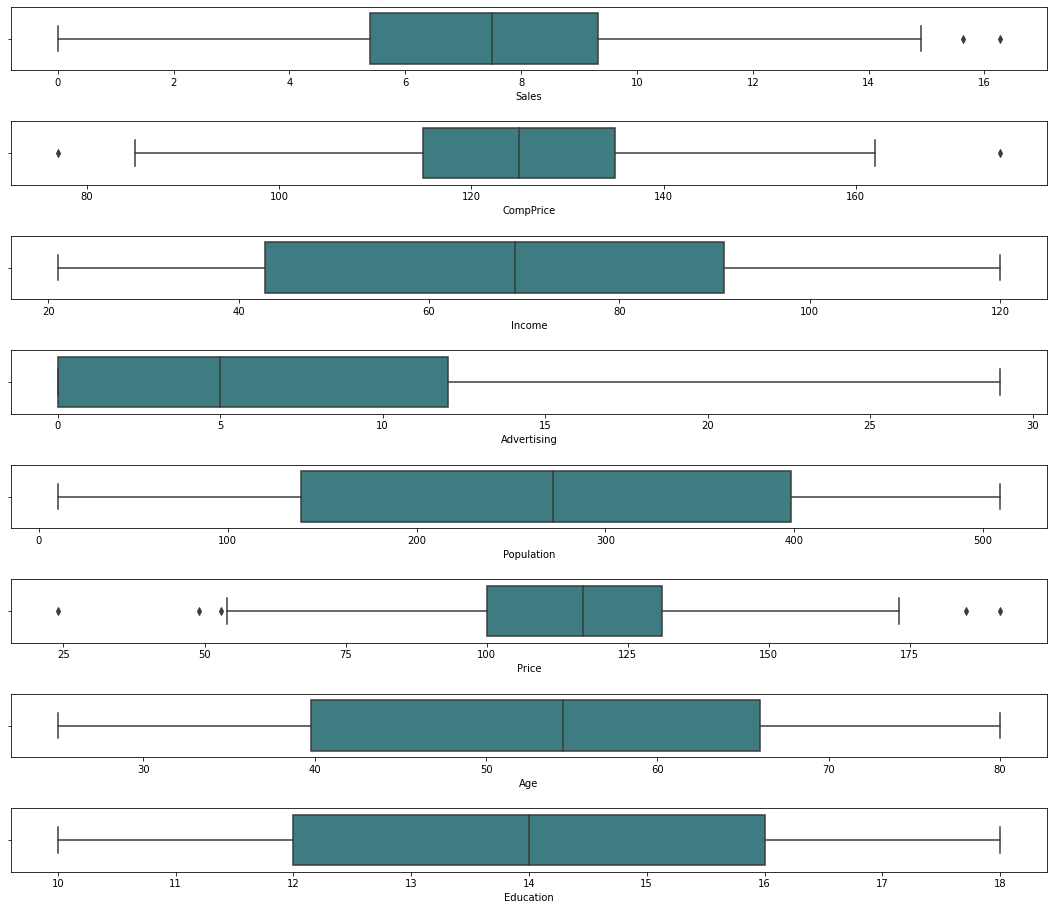

In [7]:
# outliers detetion 
ot=df.copy()
fig,axes = plt.subplots(8,1,figsize=(15,13),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette ='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

Text(0.5, 1.0, 'Sales')

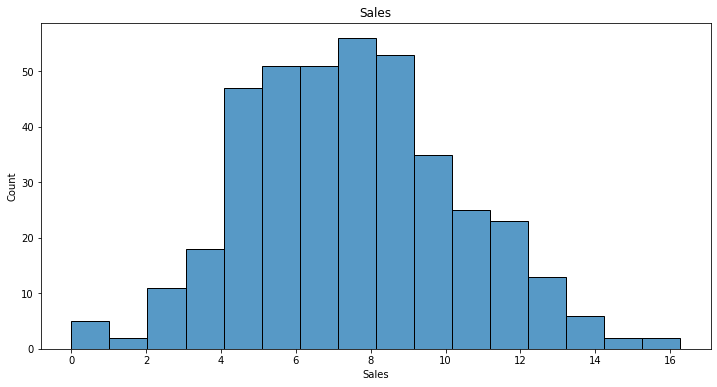

In [8]:
#visualizing numerical features
fig = plt.figure(figsize=(12,6))
sns.histplot(df['Sales'])
plt.title('Sales')

From the above plot we can see that, maximum sale greater that 14k and the average sale is distributed between 5k to 10k.

Text(0.5, 1.0, 'Competitor Price')

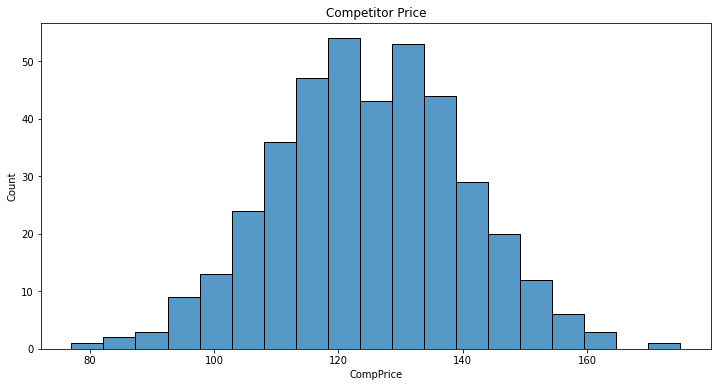

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(df['CompPrice'])
plt.title('Competitor Price')

Text(0.5, 1.0, 'Income')

<Figure size 864x432 with 0 Axes>

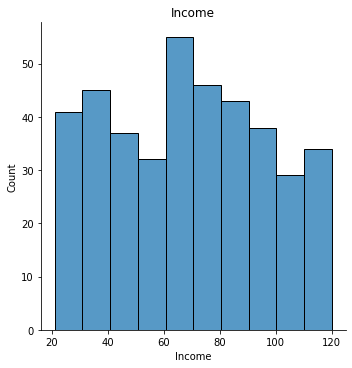

In [10]:
plt.figure(figsize=(12,6))
sns.displot(df['Income'])
plt.title('Income')

Text(0.5, 1.0, 'Advertising')

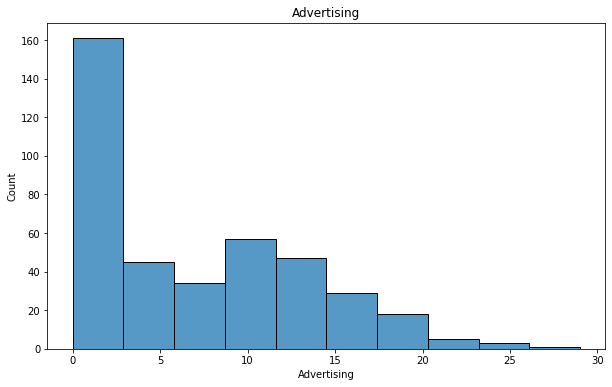

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['Advertising'])
plt.title('Advertising')

Text(0.5, 1.0, 'Population')

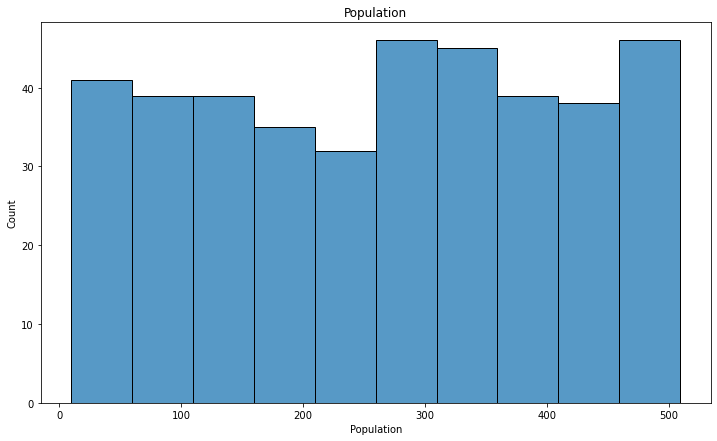

In [12]:
plt.figure(figsize=(12,7))
sns.histplot(df['Population'])
plt.title('Population')

Text(0.5, 1.0, 'Price')

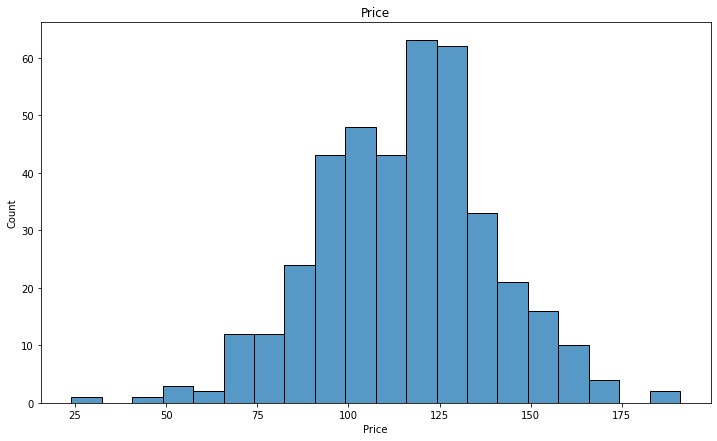

In [13]:
plt.figure(figsize=(12,7))
sns.histplot(df['Price'])
plt.title('Price')

Text(0.5, 1.0, 'Age')

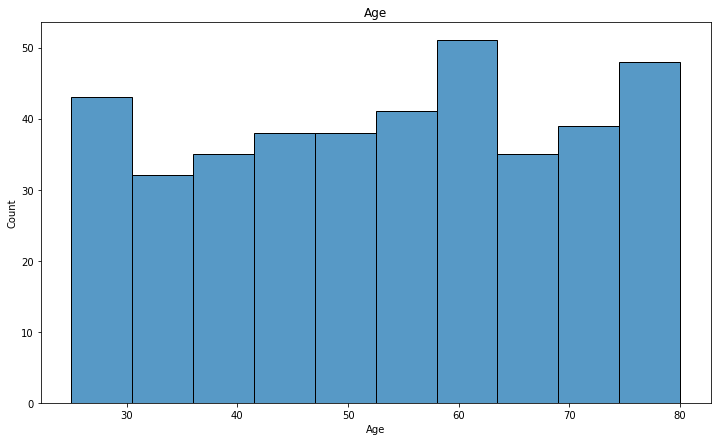

In [14]:
plt.figure(figsize=(12,7))
sns.histplot(df['Age'])
plt.title('Age')

The most of the people are of age below 30,around 60 and 80. Age can be main atrribute to cause high sale. 

Text(0.5, 1.0, 'Education')

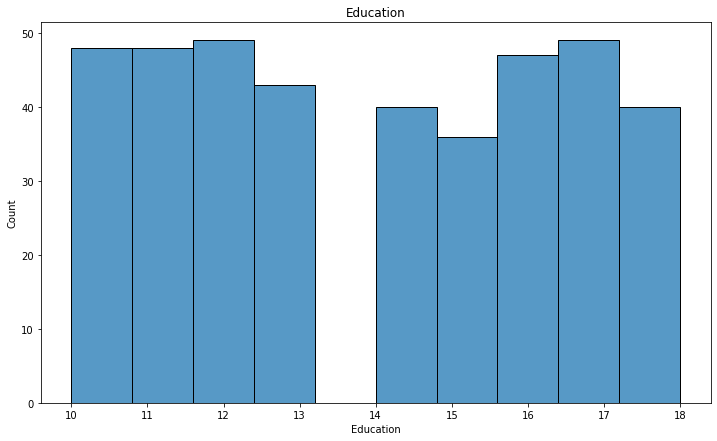

In [15]:
plt.figure(figsize=(12,7))
sns.histplot(df['Education'])
plt.title('Education')

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Shelf Location at stores')

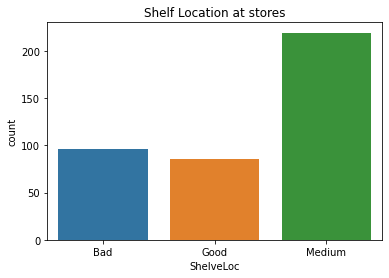

In [16]:
#visualizing categorical features
sns.countplot(df['ShelveLoc'])
plt.title('Shelf Location at stores')

Most of the store has medium level shelf location means most of the stores are unable to display their products in good way so that they can attract customers.

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Store Location is in Urban Area ')

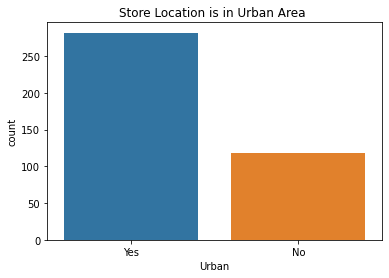

In [17]:
sns.countplot(df['Urban'])
plt.title('Store Location is in Urban Area ')

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Store is in US')

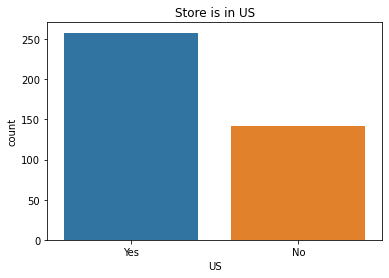

In [18]:
sns.countplot(df['US'])
plt.title('Store is in US')

In [19]:
# describing sales
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [20]:
# Treating sale as if sales between 0 - 5.39 = low , sales between 5.39 - 9.32 = medium and sales betweem 9.32 - 17 = high
df1 = df.copy()
df1['Sales_cat'] = pd.cut(x=df['Sales'], bins=[0,5.39,9.32,17], labels=['Low','Medium','High'], right=False)
df1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [21]:
df1['Sales_cat'].dtypes

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)

In [22]:
df1['Sales_cat'].value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sales')

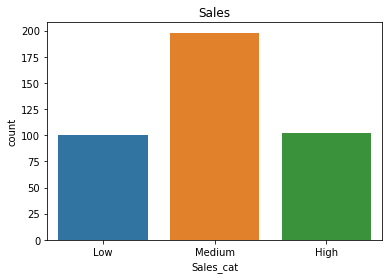

In [23]:
#plotting countplot for target variable
sns.countplot(df1['Sales_cat'])
plt.title('Sales')

In [24]:
# correlation analysis
df1.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

In [25]:
#predictive power score
import ppscore as pps

In [26]:
pps.matrix(df1)

x            y   ppscore            case  is_valid_score  \
0        Sales        Sales  1.000000  predict_itself            True   
1        Sales    CompPrice  0.000000      regression            True   
2        Sales       Income  0.000000      regression            True   
3        Sales  Advertising  0.000000      regression            True   
4        Sales   Population  0.000000      regression            True   
..         ...          ...       ...             ...             ...   
139  Sales_cat          Age  0.017423      regression            True   
140  Sales_cat    Education  0.000000      regression            True   
141  Sales_cat        Urban  0.000000  classification            True   
142  Sales_cat           US  0.000000  classification            True   
143  Sales_cat    Sales_cat  1.000000  predict_itself            True   

                  metric  baseline_score  model_score  \
0                   None          0.0000     1.000000   
1    mean absolute error         12.2150    17.223333   
2    mean absolute error         23.6325    30.317083   
3    mean absolute error          5.7300     6.332500   
4    mean absolute error        127.0450   165.681250   
..                   ...             ...          ...   
139  mean absolute error         13.8775    13.635706   
140  mean absolute error          2.2850     2.323761   
141          weighted F1          0.6000     0.583031   
142          weighted F1          0.5250     0.517299   
143                 None          0.0000     1.000000   

                        model  
0                        None  
1     DecisionTreeRegressor()  
2     DecisionTreeRegressor()  
3     DecisionTreeRegressor()  
4     DecisionTreeRegressor()  
..                        ...  
139   DecisionTreeRegressor()  
140   DecisionTreeRegressor()  
141  DecisionTreeClassifier()  
142  DecisionTreeClassifier()  
143                      None  

[144 rows x 9 columns]

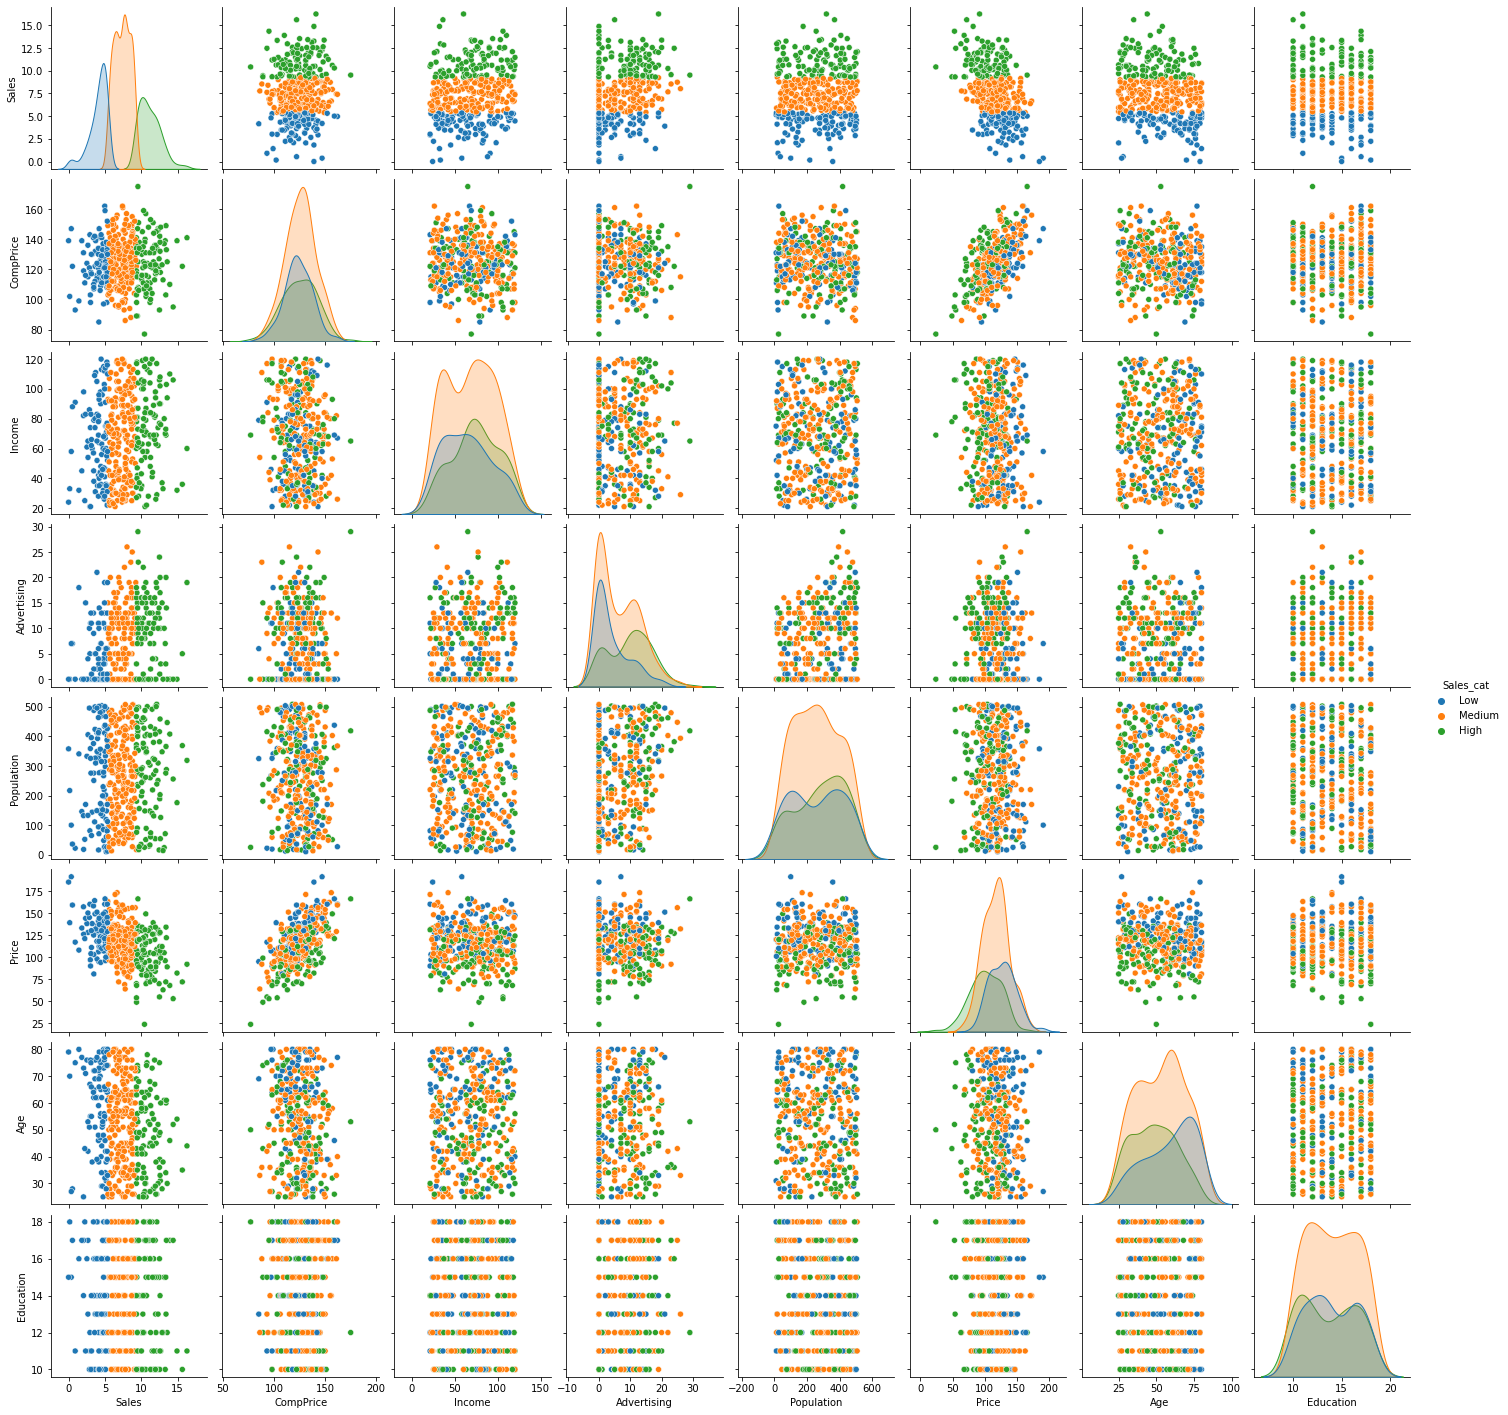

In [27]:
# plotting pairplot
sns.pairplot(df1,hue='Sales_cat')

In [28]:
#dummy variable for input categorical data
df2=pd.get_dummies(df1.iloc[:,:-1])
df2.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [29]:
df2.drop('Sales',axis=1,inplace=True)
df2.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [30]:
df2['Sales_cat']=df1.Sales_cat
df2.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes Sales_cat  
0      0       1      High  
1      0       1      High  
2      0       1      High  
3      0       1    Medium  
4      1       0       Low

In [31]:
# using lebel encoder for target variable
le = preprocessing.LabelEncoder()
le.fit(df2['Sales_cat'])
df2['Sales_cat'] = le.transform(df2['Sales_cat'])
df2.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales_cat  
0      0       1          0  
1      0       1          0  
2      0       1          0  
3      0       1          2  
4      1       0          1

In [32]:
df2.dtypes

CompPrice           int64
Income              int64
Advertising         int64
Population          int64
Price               int64
Age                 int64
Education           int64
ShelveLoc_Bad       uint8
ShelveLoc_Good      uint8
ShelveLoc_Medium    uint8
Urban_No            uint8
Urban_Yes           uint8
US_No               uint8
US_Yes              uint8
Sales_cat           int32
dtype: object

In [33]:
# changing data types 
df2[['ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes','Sales_cat']] = df2[['ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes','Sales_cat']].astype('category')

In [34]:
df2.dtypes

CompPrice              int64
Income                 int64
Advertising            int64
Population             int64
Price                  int64
Age                    int64
Education              int64
ShelveLoc_Bad       category
ShelveLoc_Good      category
ShelveLoc_Medium    category
Urban_No            category
Urban_Yes           category
US_No               category
US_Yes              category
Sales_cat           category
dtype: object

In [35]:
#spliting data into trainig and testing data set
X = df2.iloc[:,:-1]
X.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

  ShelveLoc_Bad ShelveLoc_Good ShelveLoc_Medium Urban_No Urban_Yes US_No  \
0             1              0                0        0         1     0   
1             0              1                0        0         1     0   
2             0              0                1        0         1     0   
3             0              0                1        0         1     0   
4             1              0                0        0         1     1   

  US_Yes  
0      1  
1      1  
2      1  
3      1  
4      0

In [36]:
Y = df2.Sales_cat
Y

0      0
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    0
Name: Sales_cat, Length: 400, dtype: category
Categories (3, int64): [0, 1, 2]

In [37]:
# train data and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=30)

# Building Decision Tree Classifier using Entropy Criteria

In [38]:
#import necessary library 
from sklearn.tree import DecisionTreeClassifier

#creating an object
model_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=5)

# fitting 
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

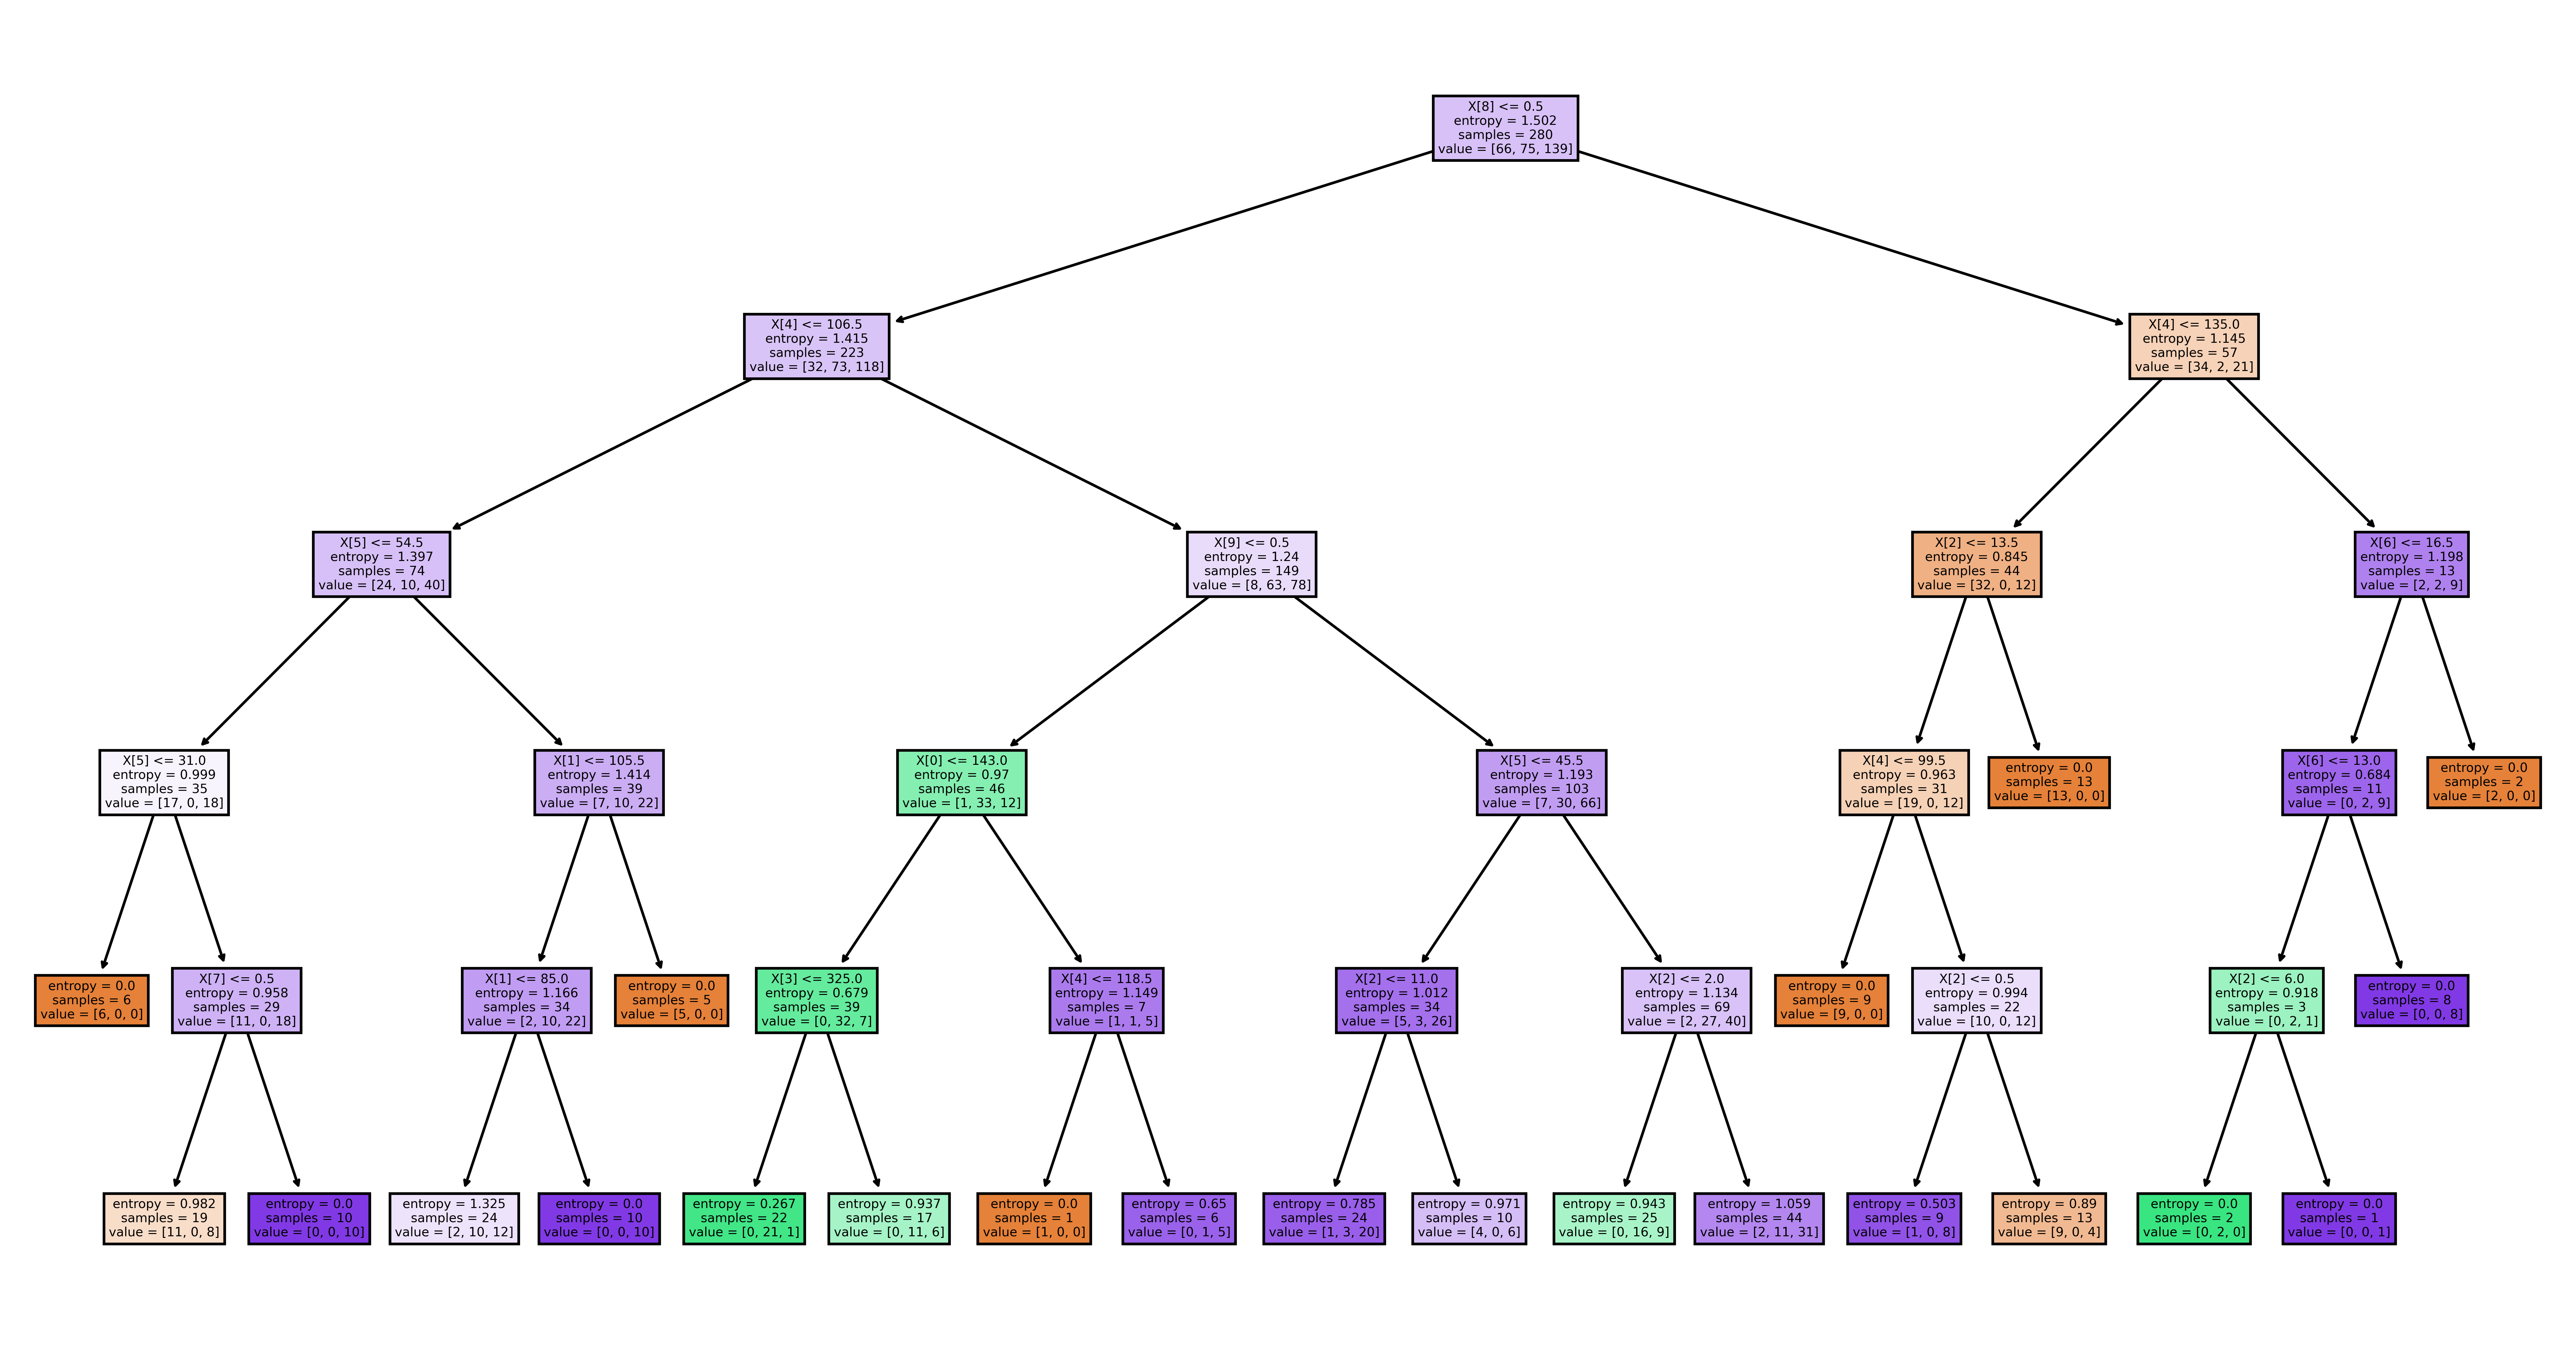

In [39]:
#plotting tree
fig = plt.figure(figsize=(17,9),dpi=(600))
tree.plot_tree(model_entropy,filled=True);

In [52]:
fn = ['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
cn = ['Low','Medium','High']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=600)
tree.plot_tree(model_entropy,
              feature_names=fn,
              class_names=cn,
              filled=True);

In [41]:
# predicting on test data
preds=model_entropy.predict(x_test)
pd.Series(preds).value_counts()

2    63
0    33
1    24
dtype: int64

In [42]:
pd.crosstab(y_test,preds)

col_0       0   1   2
Sales_cat            
0          25   1  10
1           0  16   9
2           8   7  44

In [43]:
#Accuracy
np.mean(preds==y_test)

0.7083333333333334

In [44]:
#classification report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        36
           1       0.67      0.64      0.65        25
           2       0.70      0.75      0.72        59

    accuracy                           0.71       120
   macro avg       0.71      0.69      0.70       120
weighted avg       0.71      0.71      0.71       120



## Building Decision Tree Classifier (CART) using Gini Criteria

In [45]:

# creating model
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=5)

#fitting model
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [46]:
#plotting tree
fig = plt.figure(figsize=(15,7),dpi=(600))
tree.plot_tree(model_gini,filled=True);

In [47]:
#predicting
preds_g=model_gini.predict(x_test)

In [48]:
preds_g

array([2, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2,
       0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1,
       2, 1, 1, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 1, 2, 0, 2], dtype=int64)

In [49]:
#Accuracy
np.mean(preds_g==y_test)

0.5583333333333333

In [50]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0       0   1   2
Sales_cat            
0          25   1  10
1           0  16   9
2           8   7  44

In [51]:
print(classification_report(y_test,preds_g))

              precision    recall  f1-score   support

           0       0.70      0.53      0.60        36
           1       0.44      0.48      0.46        25
           2       0.55      0.61      0.58        59

    accuracy                           0.56       120
   macro avg       0.56      0.54      0.55       120
weighted avg       0.57      0.56      0.56       120



Here, we are getting good result using 'Entropy' criterion as compare to the 'gini' criterion.